In [2]:
#!pip install ydata_profiling
#!pip install pycaret
#!pip install chart_studio

In [111]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import stopwords
from tqdm import tqdm
import seaborn as sns
sns.set_style("darkgrid")
import tensorflow as tf

#libraries for NLP
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from tqdm import tqdm
from IPython.display import HTML
import plotly
import plotly.subplots
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Conv1D, Bidirectional, Dropout, Input,SpatialDropout1D, TextVectorization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import os
import joblib
import ydata_profiling
from pycaret.classification import *
     

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [143]:
NDP = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'
TDP = '//kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
TDS = '//kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt'

In [144]:
train = pd.DataFrame(columns=['title','genre','description'])
test = pd.DataFrame(columns=['title','genre','description'])
tds = pd.DataFrame(columns=['title','genre','description'])

train = pd.read_csv( NDP , sep=':::',engine='python',names=['Title','Genre','Description'])
train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [145]:
test = pd.read_csv( TDP , sep=':::',engine='python',names=['id','Title','Description'])
test

,id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [155]:
train.describe()

,length
count,54214.000000
mean,600.452429
std,446.026620
min,42.000000
25%,325.000000
50%,464.000000
75%,713.000000
max,10504.000000


In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


<Figure size 1500x900 with 0 Axes>

<Axes: xlabel='Genre'>

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Count')

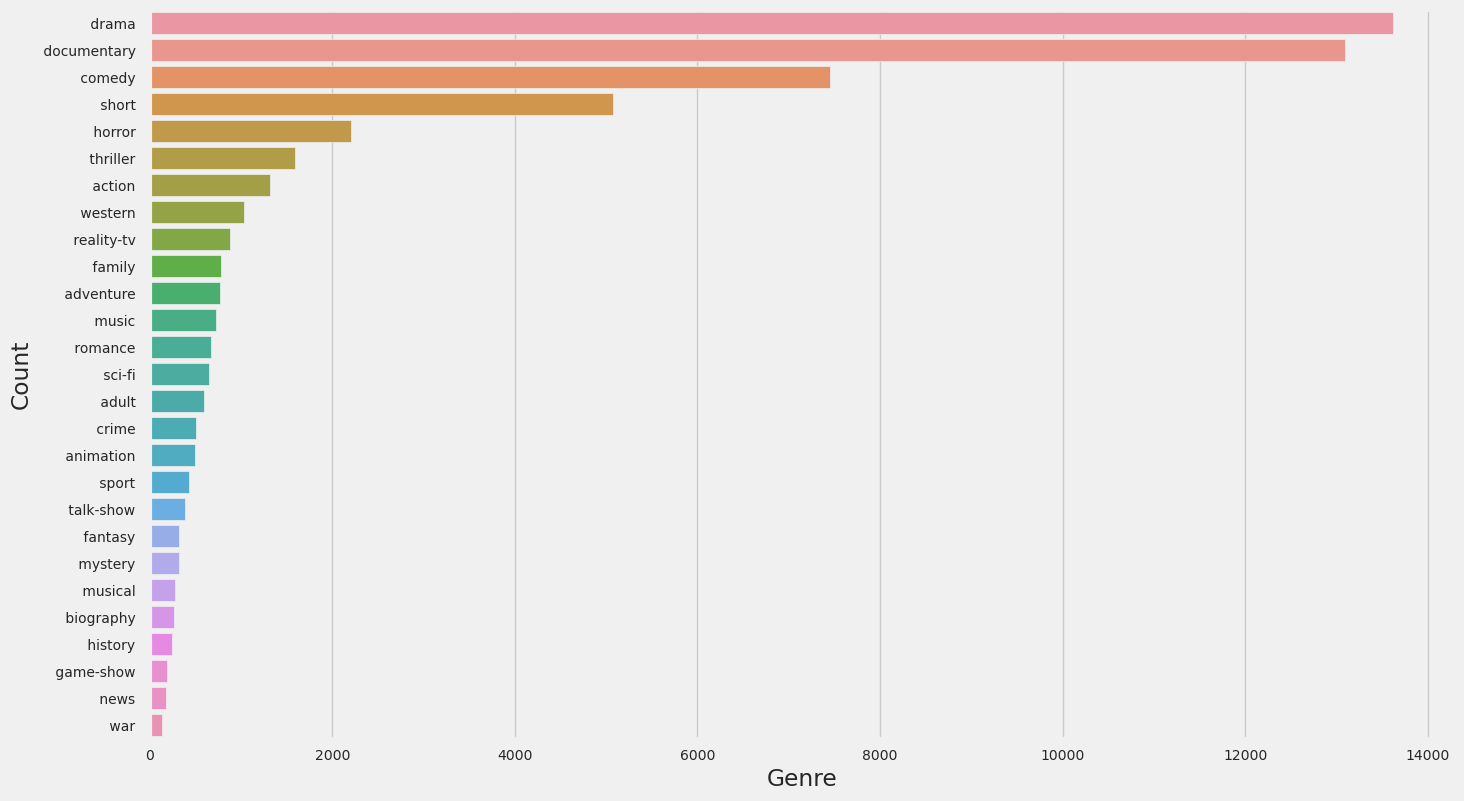

In [148]:
plt.figure(figsize=(15,9))
counts = train.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h')  
plt.xlabel('Genre')
plt.ylabel('Count')

In [30]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    |   Pack

True

In [149]:
train['length']=train['Description'].apply(len)

<Axes: ylabel='Frequency'>

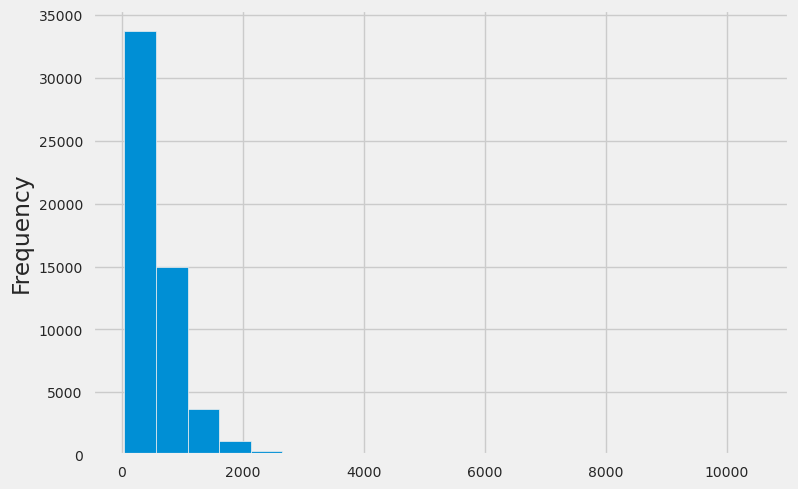

In [150]:
train['length'].plot(bins=20, kind='hist')

In [153]:
train[train['length']==42]['Description']

52225     A buddy film set in the world of fashion.
Name: Description, dtype: object

In [154]:
def clean_text(text):
    text = text.lower()                                  
    text =  re.sub(r'@\S+', '',text)                     
    text =  re.sub(r'http\S+', '',text)                  
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            
    return text

In [158]:
train['length_Text_cleaning']=train['Text_cleaning'].apply(len)

In [72]:
train['Text_cleaning'] = train.Description.apply(clean_text)
test['Text_cleaning'] = test.Description.apply(clean_text)

,id,Title,Description,Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [74]:
def model():
  VECTOR_FEATURES = 32
  lstm_model = Sequential()
  lstm_model.add(Embedding(VOC_SIZE,
                      VECTOR_FEATURES,
                      input_length=SENTENCE_LENGTH))
  lstm_model.add(LSTM(100, return_sequences = True))
  lstm_model.add(GlobalMaxPool1D())
  lstm_model.add(BatchNormalization())
  lstm_model.add(Dropout(0.5))
  lstm_model.add(Dense(10, activation="relu"))
  lstm_model.add(Dropout(0.25))
  lstm_model.add(Dense(1, activation = "sigmoid"))
  return lstm_modelprint('Dataframe size (before removal): ',len(train_data))
filt=train['length_Text_cleaning']>2000
train.drop(train[filt].index,axis=0,inplace=True)     
print('Dataframe size (after removal): ',len(train))
print(f'Removed rows: {filt.sum()}')

Dataframe size (after removal):  54014
Removed rows: 200


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Genre', ylabel='length_Text_cleaning'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' drama '),
  Text(1, 0, ' thriller '),
  Text(2, 0, ' adult '),
  Text(3, 0, ' documentary '),
  Text(4, 0, ' comedy '),
  Text(5, 0, ' crime '),
  Text(6, 0, ' reality-tv '),
  Text(7, 0, ' horror '),
  Text(8, 0, ' sport '),
  Text(9, 0, ' animation '),
  Text(10, 0, ' action '),
  Text(11, 0, ' fantasy '),
  Text(12, 0, ' short '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' music '),
  Text(15, 0, ' adventure '),
  Text(16, 0, ' talk-show '),
  Text(17, 0, ' western '),
  Text(18, 0, ' family '),
  Text(19, 0, ' mystery '),
  Text(20, 0, ' history '),
  Text(21, 0, ' news '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' romance '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' musical '),
  Text(26, 0, ' war ')])

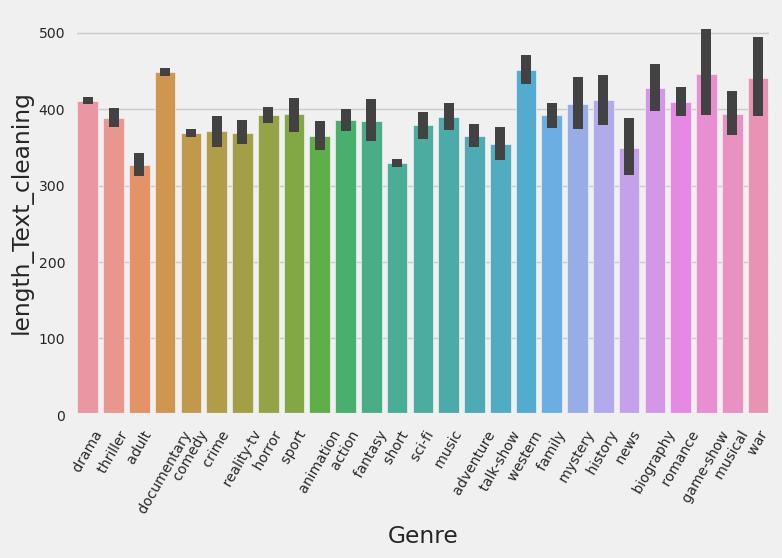

<Figure size 2000x500 with 0 Axes>

<Axes: >

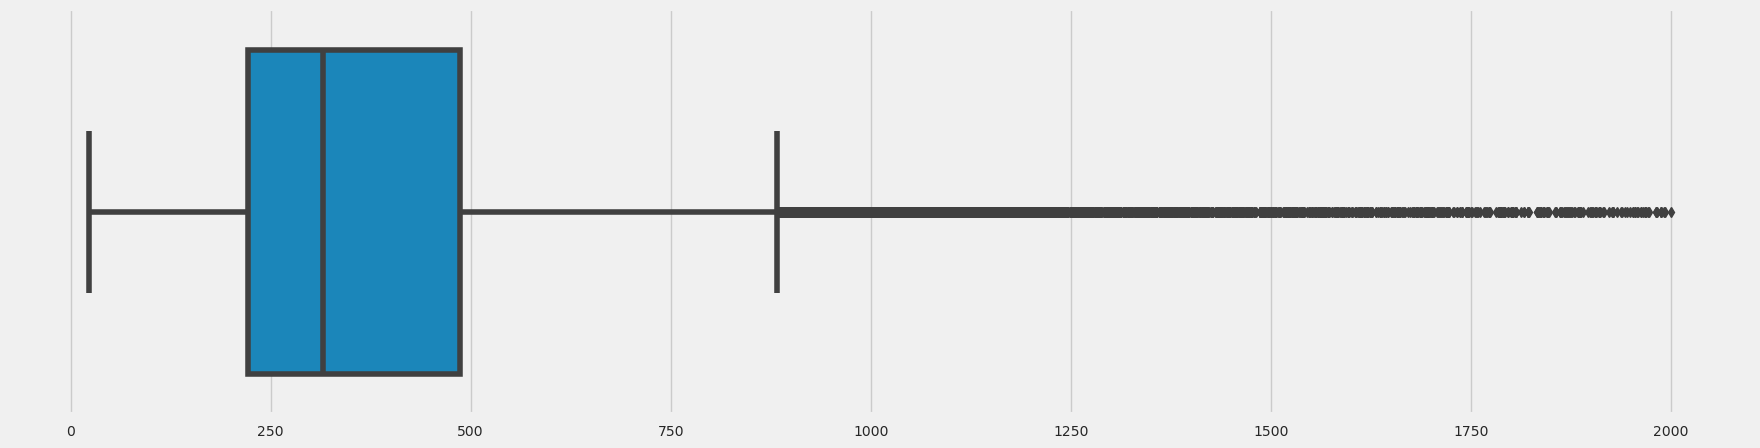

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train)  
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train['length_Text_cleaning'].values,hue='Genre',data=train)
plt.show()

In [79]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['Text_cleaning'].values)
tds='/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt'
tds=pd.read_csv( tds , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
tds.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [83]:
x = tokenizer.texts_to_sequences(train['Text_cleaning'].values)
x = pad_sequences(x, maxlen=max_len)
y = pd.get_dummies(train['Genre']).values

xtest = tokenizer.texts_to_sequences(test['Text_cleaning'].values)
xtest = pad_sequences(xtest, maxlen=max_len)
ytest = pd.get_dummies(tds['Genre']).values


EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(x, y, epochs=10, batch_size=32,validation_data=(xtest,ytest), callbacks=my_callbacks)

Epoch 1/10
1688/1688 [==============================] - 634s 373ms/step - loss: 1.9269 - accuracy: 0.4387 - val_loss: 1.6546 - val_accuracy: 0.5179
Epoch 2/10
1688/1688 [==============================] - 649s 384ms/step - loss: 1.4158 - accuracy: 0.5910 - val_loss: 1.5386 - val_accuracy: 0.5542
Epoch 3/10
1688/1688 [==============================] - 651s 386ms/step - loss: 1.0758 - accuracy: 0.6906 - val_loss: 1.5702 - val_accuracy: 0.5563
Epoch 4/10
1688/1688 [==============================] - 643s 381ms/step - loss: 0.7898 - accuracy: 0.7716 - val_loss: 1.6908 - val_accuracy: 0.5489


In [87]:
results = model.evaluate(xtest, ytest, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.69082
Test Accuracy: 54.89%


<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Accuracy')

<Axes: >

Text(0.5, 1.0, 'Loss')

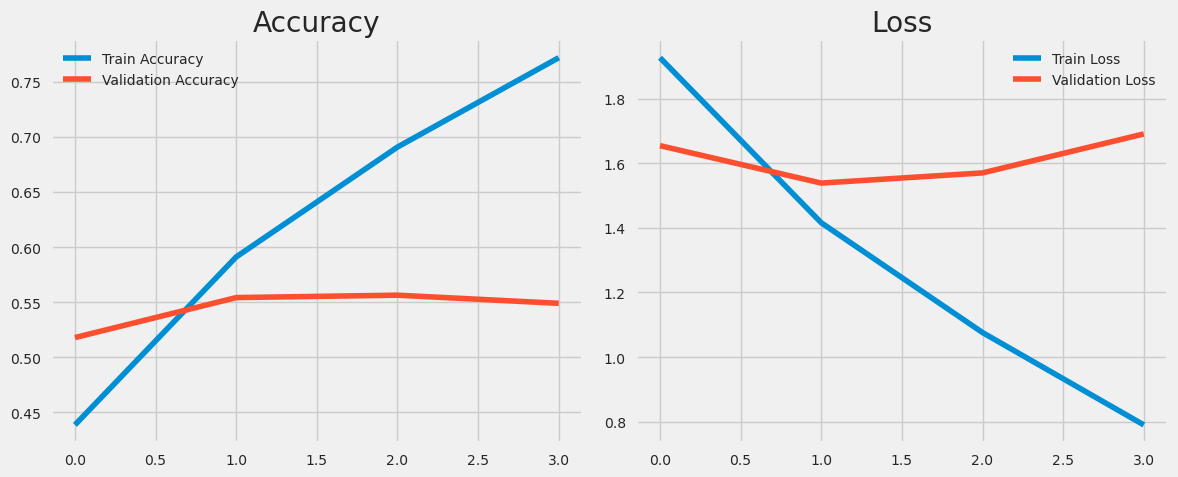

In [89]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()